In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
oliv=datasets.fetch_olivetti_faces()

In [33]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [34]:
oliv["data"].shape

(400, 4096)

In [35]:
oliv["images"].shape

(400, 64, 64)

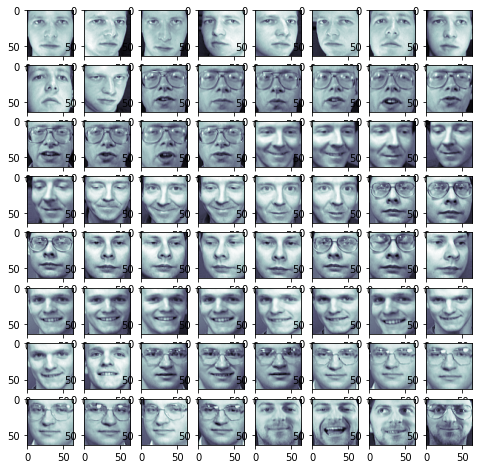

In [36]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [50]:
x=oliv.data
y=oliv.target

In [38]:
pca=PCA()
pca.fit(x)

PCA()

In [39]:
pca.components_.shape

(400, 4096)

In [40]:
k=0
total=sum(pca.explained_variance_)
current_varience=0
while (current_varience/total<0.95):
    current_varience+=pca.explained_variance_[k]
    k+=1
k

123

In [41]:
pca=PCA(n_components=k,whiten=True)
x_transformed=pca.fit_transform(x)

In [42]:
x_transformed.shape

(400, 123)

In [43]:
x_approx=pca.inverse_transform(x_transformed)
x_approx.shape

(400, 4096)

In [44]:
x_approx_images=x_approx.reshape(400,64,64)

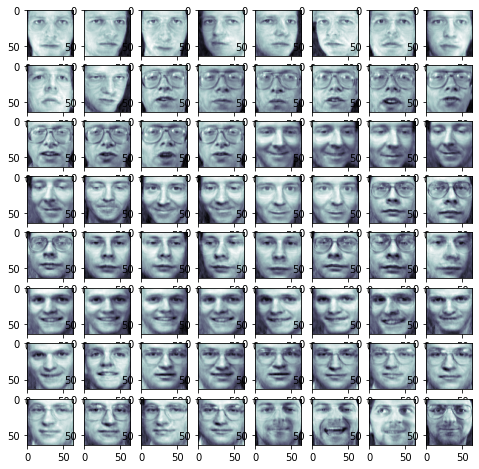

In [45]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [46]:
eigenv=pca.components_
eigenv.shape

(123, 4096)

In [47]:
eigenfaces=eigenv.reshape(123,64,64)

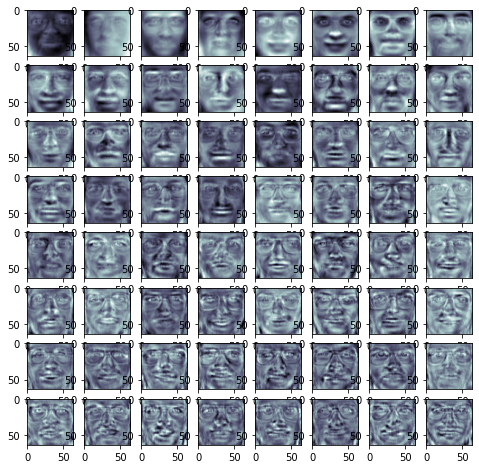

In [48]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()